In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_dir = './data'

data_entry_file = os.path.join(data_dir, 'Data_Entry_2017_v2020.csv')

data_entry_df = pd.read_csv(data_entry_file)

In [3]:
data_entry_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [4]:
data_entry_df_copy = data_entry_df.copy()

In [5]:
finding_labels_df = data_entry_df_copy['Finding Labels'].str.get_dummies(sep='|')

data_entry_df_copy = pd.concat([data_entry_df_copy, finding_labels_df], 1)

In [6]:
data_entry_df_copy.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Atelectasis',
       'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema',
       'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [7]:
old_new_columns_map = {
    'Image Index': 'image_index',
    'Finding Labels': 'finding_labels',
    'Follow-up #': 'follow_up_number',
    'Patient ID': 'patient_id',
    'Patient Age':'patient_age',
    'Patient Gender': 'patient_gender',
    'View Position': 'view_position',
    'OriginalImage[Width': 'original_image_width',
    'Height]': 'original_image_height',
    'OriginalImagePixelSpacing[x': 'original_image_pixel_spacing_x',
    'y]': 'original_image_pixel_spacing_y',
    'Atelectasis': 'atelectasis',
    'Cardiomegaly': 'cardiomegaly',
    'Consolidation': 'consolidation',
    'Edema': 'edema',
    'Effusion': 'effusion',
    'Emphysema': 'emphysema',
    'Fibrosis': 'fibrosis',
    'Hernia': 'hernia',
    'Infiltration': 'infiltration',
    'Mass': 'mass',
    'No Finding': 'no_finding',
    'Nodule': 'nodule',
    'Pleural_Thickening': 'pleural_thickening',
    'Pneumonia': 'pneumonia',
    'Pneumothorax': 'pneumothorax'
}

data_entry_df_copy.rename(columns=old_new_columns_map, inplace=True)

In [8]:
old_new_columns_map = {
    'Atelectasis': 'atelectasis',
    'Cardiomegaly': 'cardiomegaly',
    'Consolidation': 'consolidation',
    'Edema': 'edema',
    'Effusion': 'effusion',
    'Emphysema': 'emphysema',
    'Fibrosis': 'fibrosis',
    'Hernia': 'hernia',
    'Infiltration': 'infiltration',
    'Mass': 'mass',
    'No Finding': 'no_finding',
    'Nodule': 'nodule',
    'Pleural_Thickening': 'pleural_thickening',
    'Pneumonia': 'pneumonia',
    'Pneumothorax': 'pneumothorax'
}

finding_labels_df.rename(columns=old_new_columns_map, inplace=True)

In [9]:
current_palette = sns.color_palette("colorblind")

sns.set_palette(current_palette)

base_color=current_palette[0]

plt.rcParams['figure.figsize'] = (8, 8)

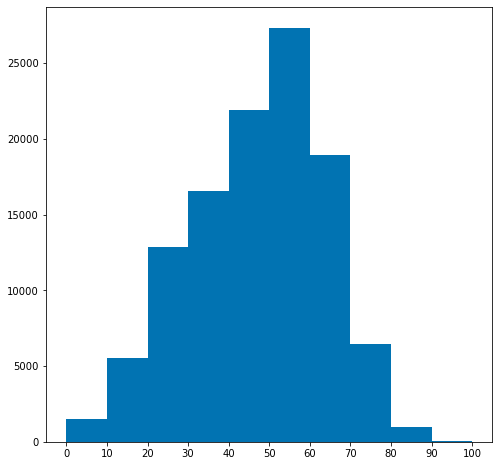

In [10]:
bins = np.arange(0, 95+10, 10)

plt.hist(data_entry_df_copy['patient_age'], bins=bins)

plt.xticks(bins)

plt.show()

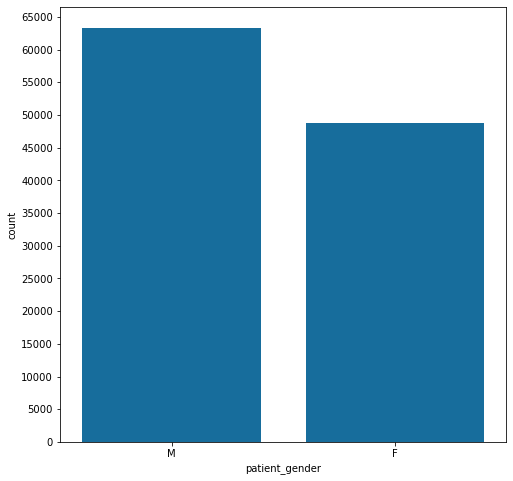

In [11]:
bins = np.arange(0, 63340+5000, 5000)

sns.countplot(data=data_entry_df_copy, x='patient_gender', color=base_color)

plt.yticks(bins)

plt.show()

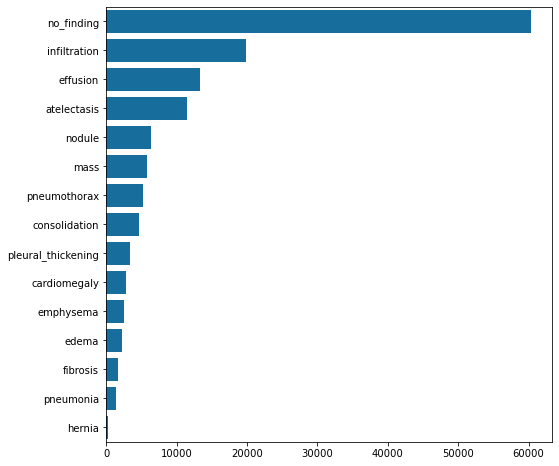

In [12]:
finding_labels_sums = finding_labels_df.sum()

sns.barplot(
    x=finding_labels_sums,
    y=finding_labels_sums.keys(), 
    color=base_color,
    order=finding_labels_sums.sort_values(ascending=False).index
)

plt.show()

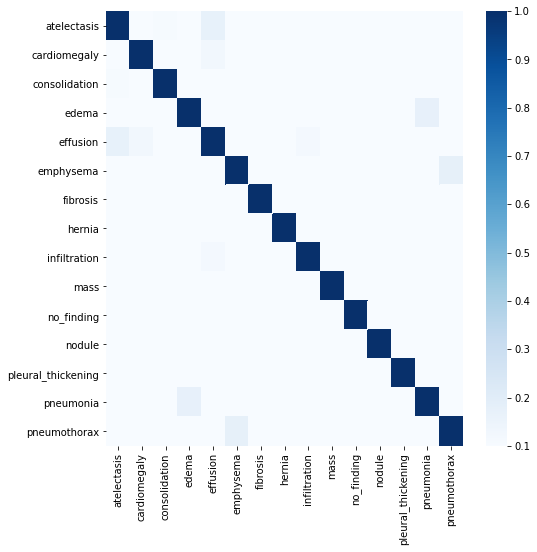

In [13]:
# calculate the correlation matrix
corr = finding_labels_df.corr()

# plot the heatmap
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmin=0.1,
    cmap='Blues'
)

plt.show()

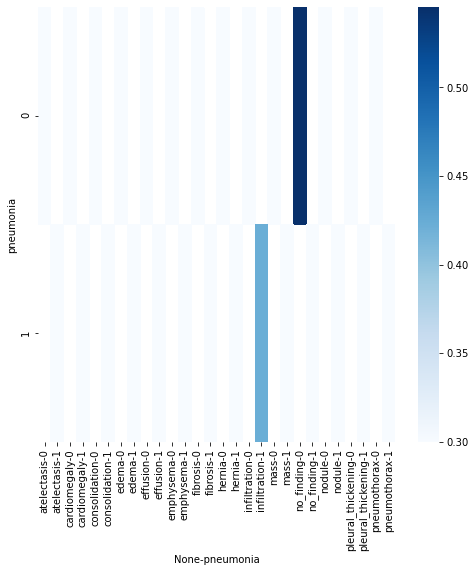

In [14]:
heatmap1_data = pd.pivot_table(finding_labels_df, 
                     index='pneumonia', 
                     columns=['pneumonia'])
                    

sns.heatmap(heatmap1_data, cmap="Blues", vmin=0.3)

plt.show()

In [15]:
data_entry_df_copy.count()

image_index                       112120
finding_labels                    112120
follow_up_number                  112120
patient_id                        112120
patient_age                       112120
patient_gender                    112120
view_position                     112120
original_image_width              112120
original_image_height             112120
original_image_pixel_spacing_x    112120
original_image_pixel_spacing_y    112120
atelectasis                       112120
cardiomegaly                      112120
consolidation                     112120
edema                             112120
effusion                          112120
emphysema                         112120
fibrosis                          112120
hernia                            112120
infiltration                      112120
mass                              112120
no_finding                        112120
nodule                            112120
pleural_thickening                112120
pneumonia       

In [16]:
data_entry_df_copy['number_of_dieases'] = \
    data_entry_df_copy[finding_labels_df.columns.drop('no_finding')].sum(axis=1)

In [17]:
data_entry_df_copy.query('patient_id == 30805')

,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_image_width,original_image_height,original_image_pixel_spacing_x,...,fibrosis,hernia,infiltration,mass,no_finding,nodule,pleural_thickening,pneumonia,pneumothorax,number_of_dieases
112119,00030805_000.png,No Finding,0,30805,26,M,PA,2048,2500,0.171,...,0,0,0,0,1,0,0,0,0,0
